In [ ]:
from onekey_algo.custom.Manager import onekey_show

onekey_show('人机对比')

In [5]:
import pandas as pd
import shutil
import os
import numpy as np
import matplotlib.pyplot as plt
import onekey_algo.custom.components as okcomp
from onekey_algo import get_param_in_cwd

plt.rcParams['figure.dpi'] = 300
os.makedirs('img', exist_ok=True)
# 获取配置
task = get_param_in_cwd('task_column') or 'label'
label_file = r"J:\4type\model\histogramWRT\human_ai\label.csv"
AI_file = r"J:\4type\model\histogramWRT\human_ai\ai.csv"
human_only_file = r"J:\4type\model\histogramWRT\human_ai\human_only.csv"
AI_assistant_file = r"J:\4type\model\histogramWRT\human_ai\ai_assist.csv"

# 读取label文件。
labels = [task]
label_data_ = pd.read_csv(label_file)
label_data_ = label_data_.dropna(axis=1)

ids = label_data_['ID']
print(label_data_.columns)
label_data = label_data_[['ID'] + labels]
label_data

Index(['ID', 'label'], dtype='object')


,ID,label
0,20230804-142328,3
1,20230806-131028,1
2,20230806-131208,3
3,20230806-143911,0
4,20230806-145223,3
...,...,...
691,CT873838,3
692,CT873838_1,3
693,CT878142,1
694,CT883444,1


# 人机对比

In [35]:
import pandas as pd

subset = 'train'
ALL_results = pd.read_csv(AI_file)
ALL_results.columns = ['ID', 'AI']


In [36]:
human_results = pd.read_csv(human_only_file)
model_names = ['AI'] + list(human_results.columns[1:])
ALL_results = pd.merge(pd.merge(ALL_results, human_results, on='ID', how='inner'), label_data_)
ALL_results
print(model_names)

['AI', 'Jounior', 'Senior']


In [37]:
AI_assist = pd.read_csv(AI_assistant_file)
AI_assist.columns = ['ID','Jounior&AI', 'Senior&AI']
model_names += list(AI_assist.columns[1:])
print(model_names)

['AI', 'Jounior', 'Senior', 'Jounior&AI', 'Senior&AI']


In [38]:
ALL_results = pd.merge(ALL_results,AI_assist,how="inner",on="ID")
ALL_results

,ID,AI,Jounior,Senior,label,Jounior&AI,Senior&AI
0,20230804-142328,3,3,1.0,3,3,1.0
1,20230806-131028,1,1,1.0,1,1,1.0
2,20230806-131208,3,3,3.0,3,3,3.0
3,20230806-143911,0,1,3.0,0,1,3.0
4,20230806-145223,3,3,3.0,3,3,3.0
...,...,...,...,...,...,...,...
691,CT873838,0,3,3.0,3,3,3.0
692,CT873838_1,3,3,NaN,3,3,NaN
693,CT878142,0,1,NaN,1,1,NaN
694,CT883444,2,1,NaN,1,1,NaN


In [39]:
ALL_results = ALL_results.fillna(method='ffill',axis=1)
ALL_results['AI'] = ALL_results['AI'].astype(int)
ALL_results['Jounior'] = ALL_results['Jounior'].astype(int)
ALL_results['Senior'] = ALL_results['Senior'].astype(int)
ALL_results['label'] = ALL_results['label'].astype(int)
ALL_results['Jounior&AI'] = ALL_results['Jounior&AI'].astype(int)
ALL_results['Senior&AI'] = ALL_results['Senior&AI'].astype(int)
ALL_results

,ID,AI,Jounior,Senior,label,Jounior&AI,Senior&AI
0,20230804-142328,3,3,1,3,3,1
1,20230806-131028,1,1,1,1,1,1
2,20230806-131208,3,3,3,3,3,3
3,20230806-143911,0,1,3,0,1,3
4,20230806-145223,3,3,3,3,3,3
...,...,...,...,...,...,...,...
691,CT873838,0,3,3,3,3,3
692,CT873838_1,3,3,3,3,3,3
693,CT878142,0,1,1,1,1,1
694,CT883444,2,1,1,1,1,1


In [49]:
ALL_results.to_csv(r"J:\4type\model\histogramWRT\human_ai\ALL_results.csv",index=False)

In [56]:
ALL_results = pd.read_csv(r"J:\4type\model\histogramWRT\human_ai\ALL_results.csv")

In [57]:
ALL_results = pd.get_dummies(ALL_results, columns=['AI', 'Jounior', 'Senior', 'Jounior&AI', 'Senior&AI'], drop_first=False)

In [58]:
ALL_results

,ID,label,AI_0,AI_1,AI_2,AI_3,Jounior_0,Jounior_1,Jounior_2,Jounior_3,...,Senior_2,Senior_3,Jounior&AI_0,Jounior&AI_1,Jounior&AI_2,Jounior&AI_3,Senior&AI_0,Senior&AI_1,Senior&AI_2,Senior&AI_3
0,20230804-142328,3,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,20230806-131028,1,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,20230806-131208,3,0,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,20230806-143911,0,1,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
4,20230806-145223,3,0,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,CT873838,3,1,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
692,CT873838_1,3,0,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
693,CT878142,1,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
694,CT883444,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


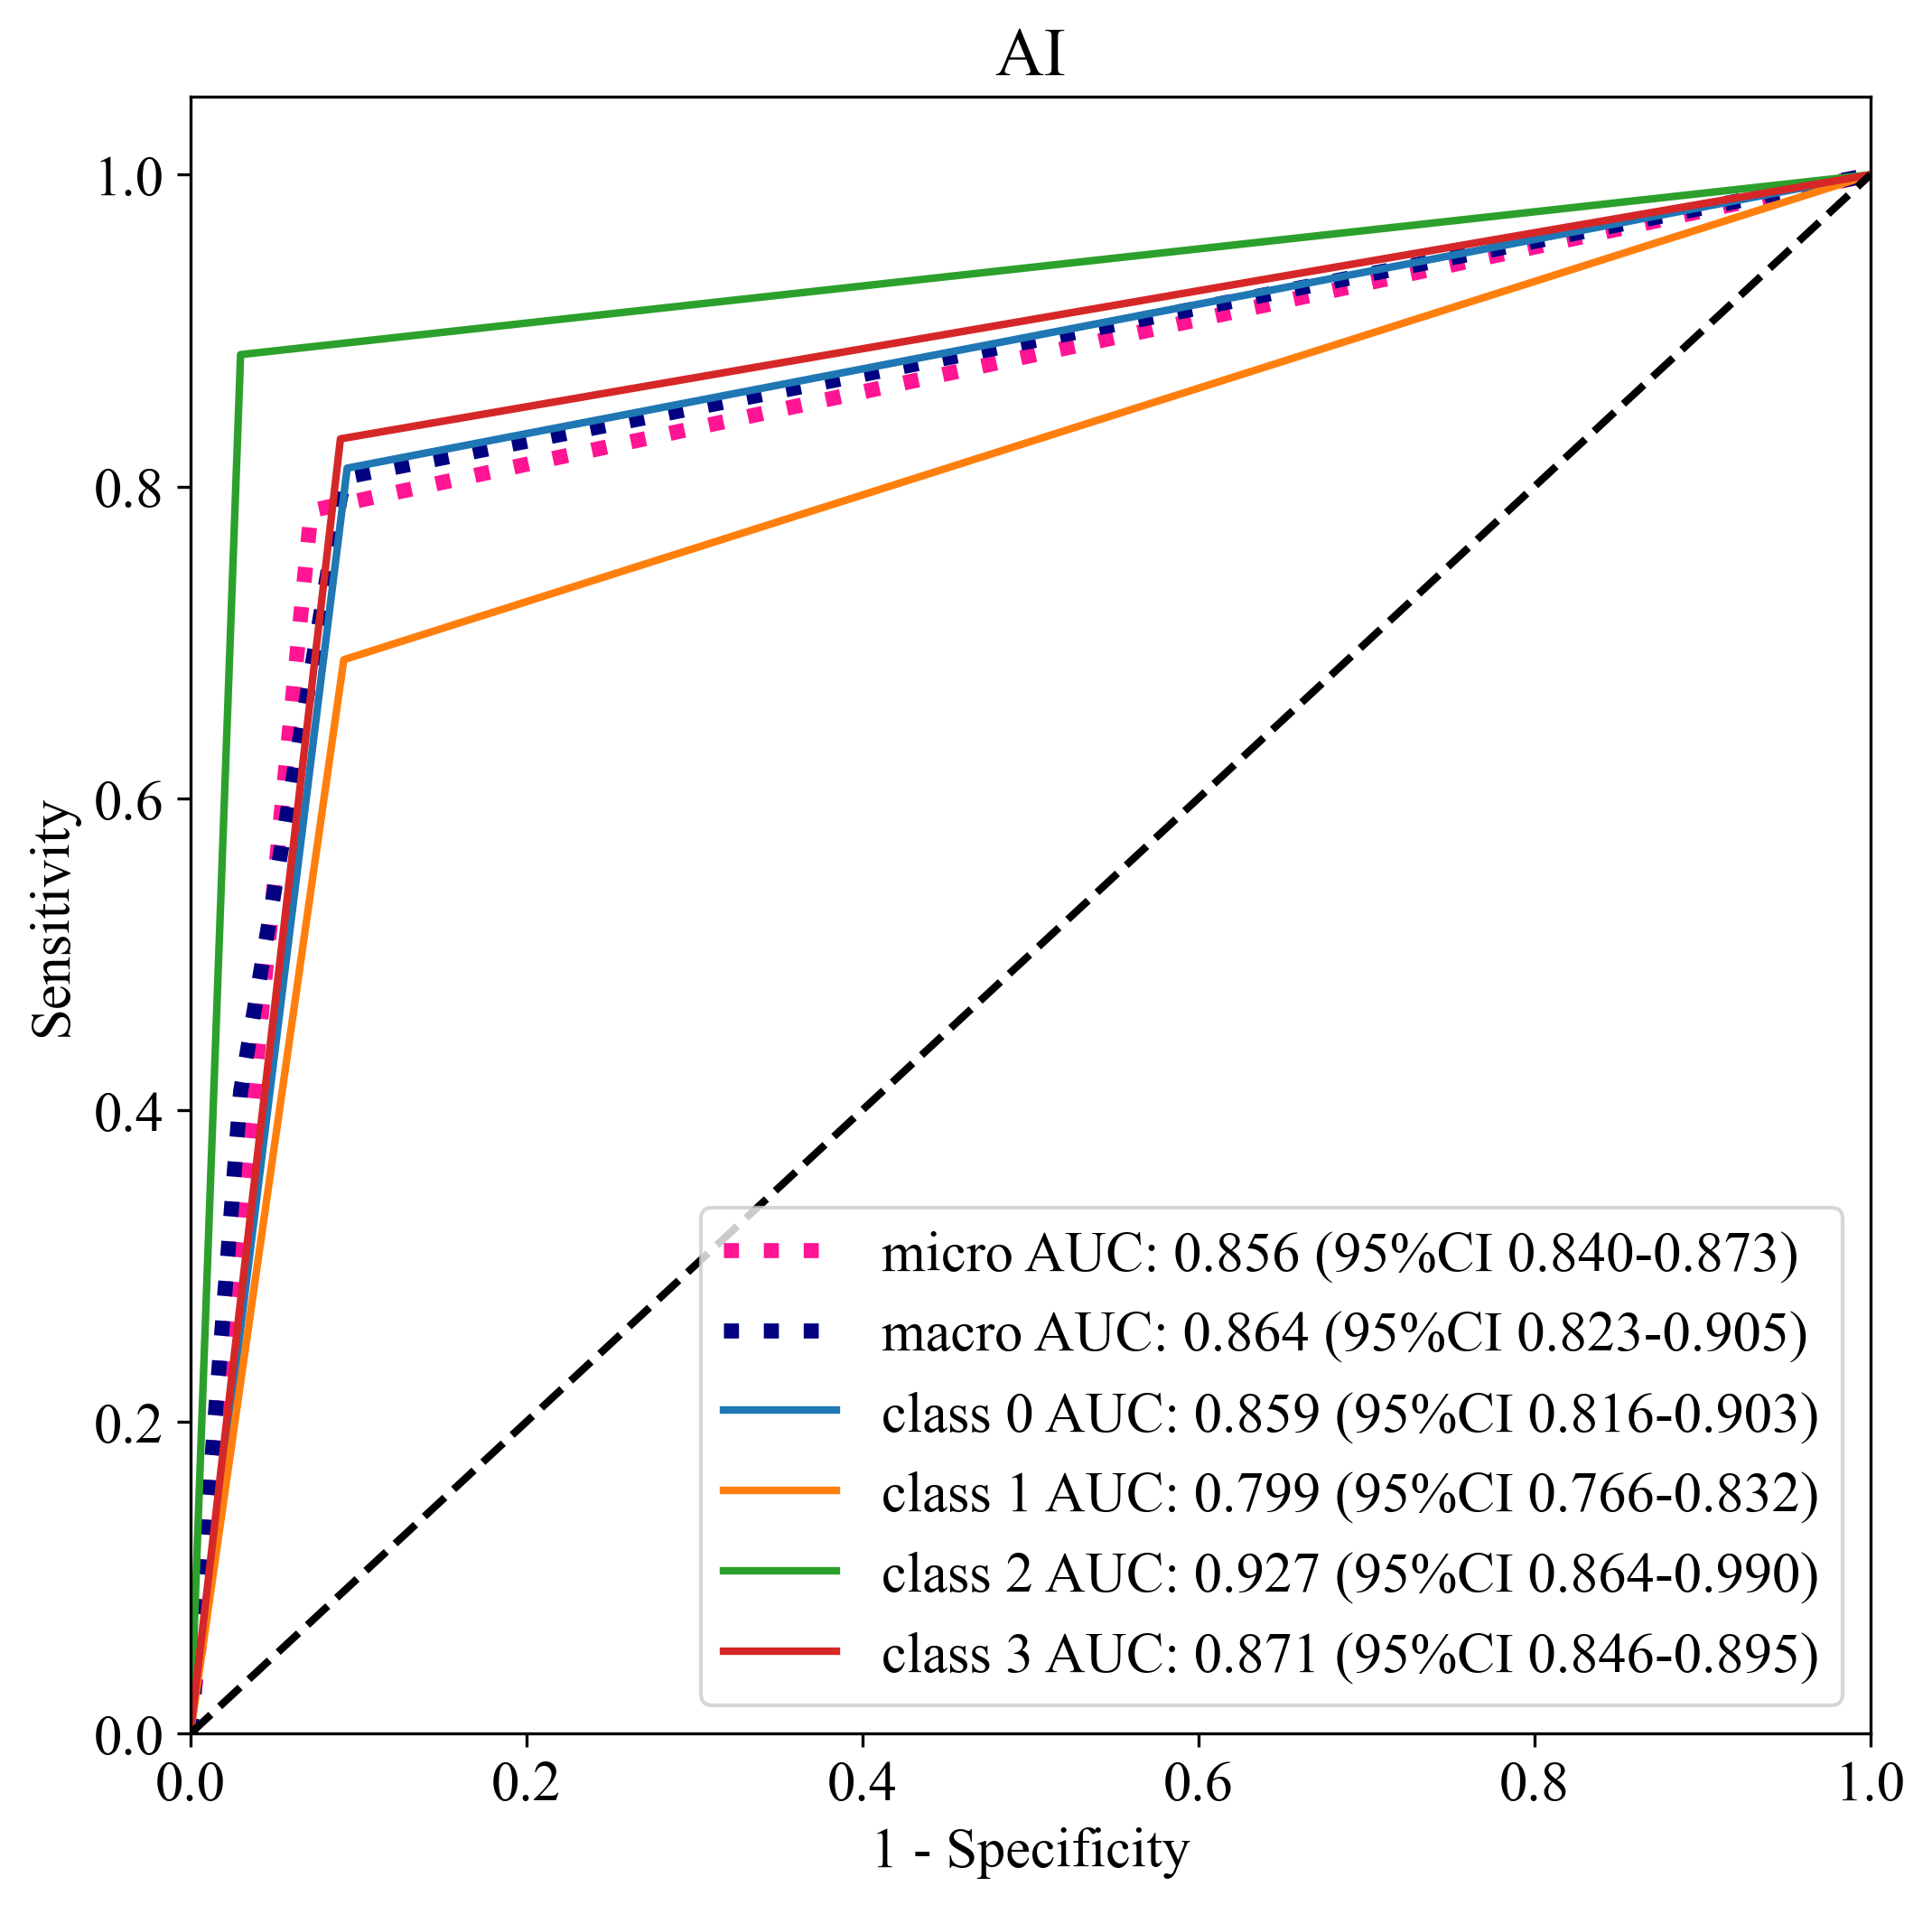

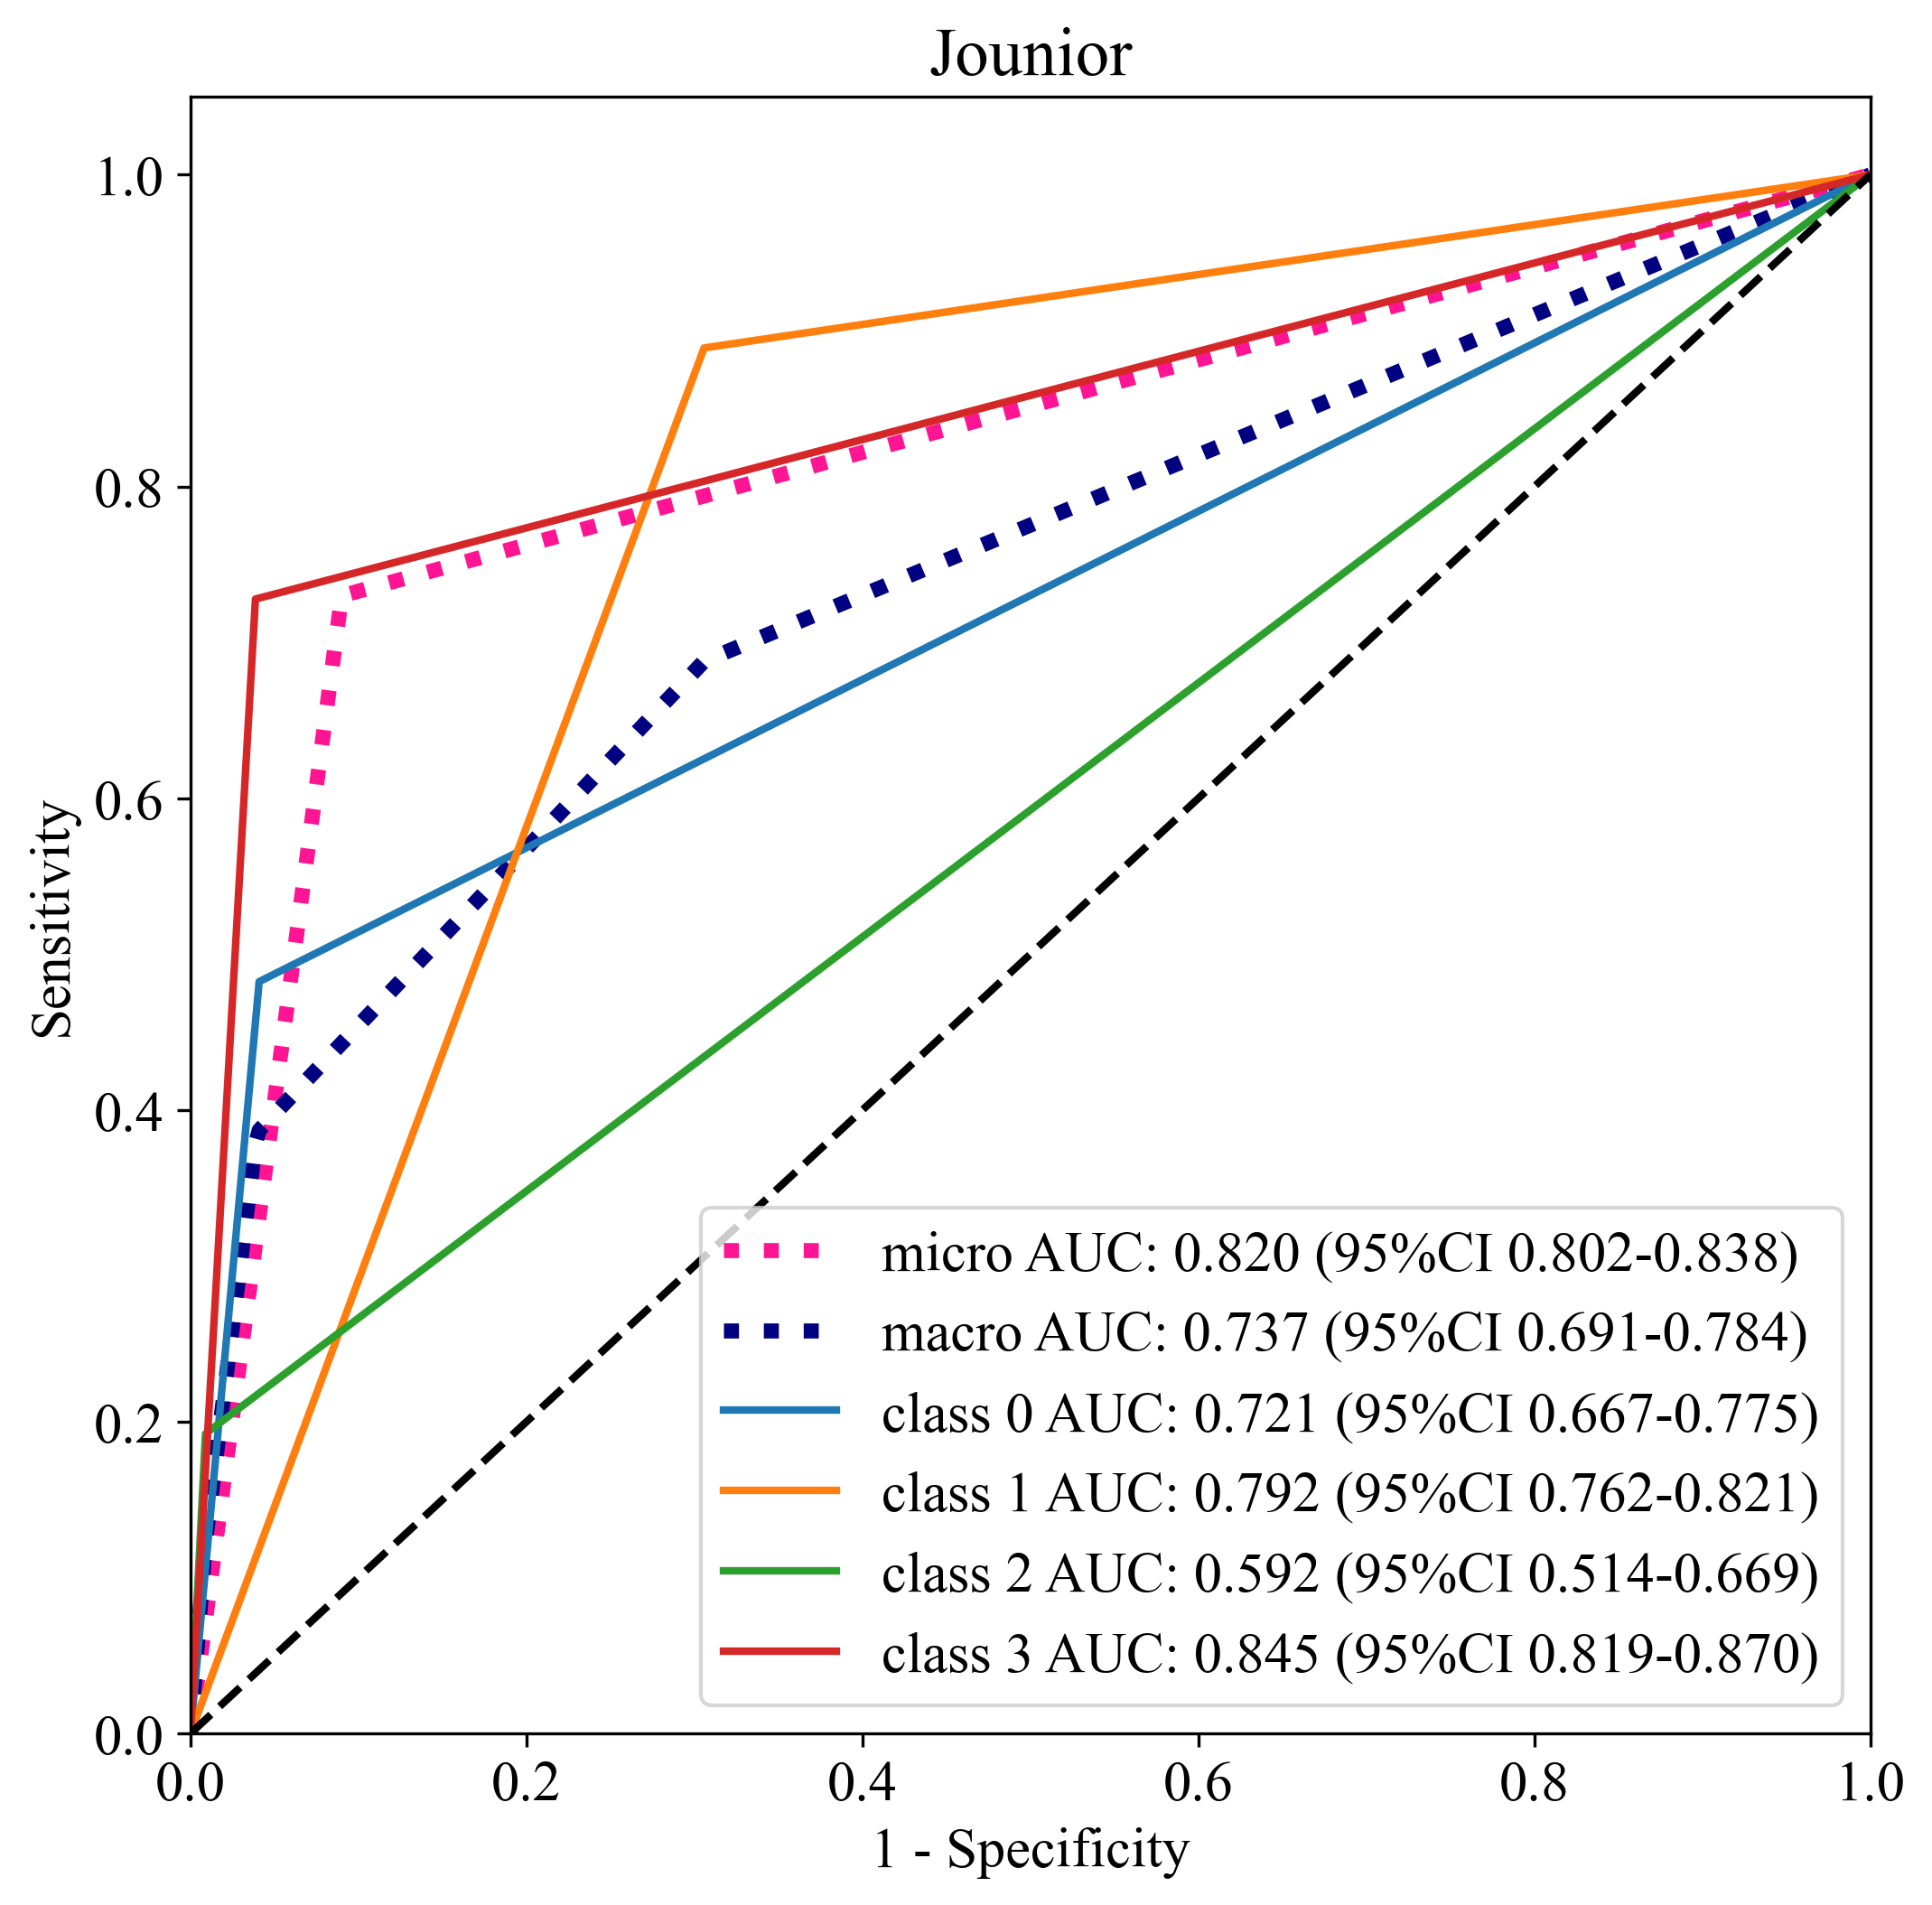

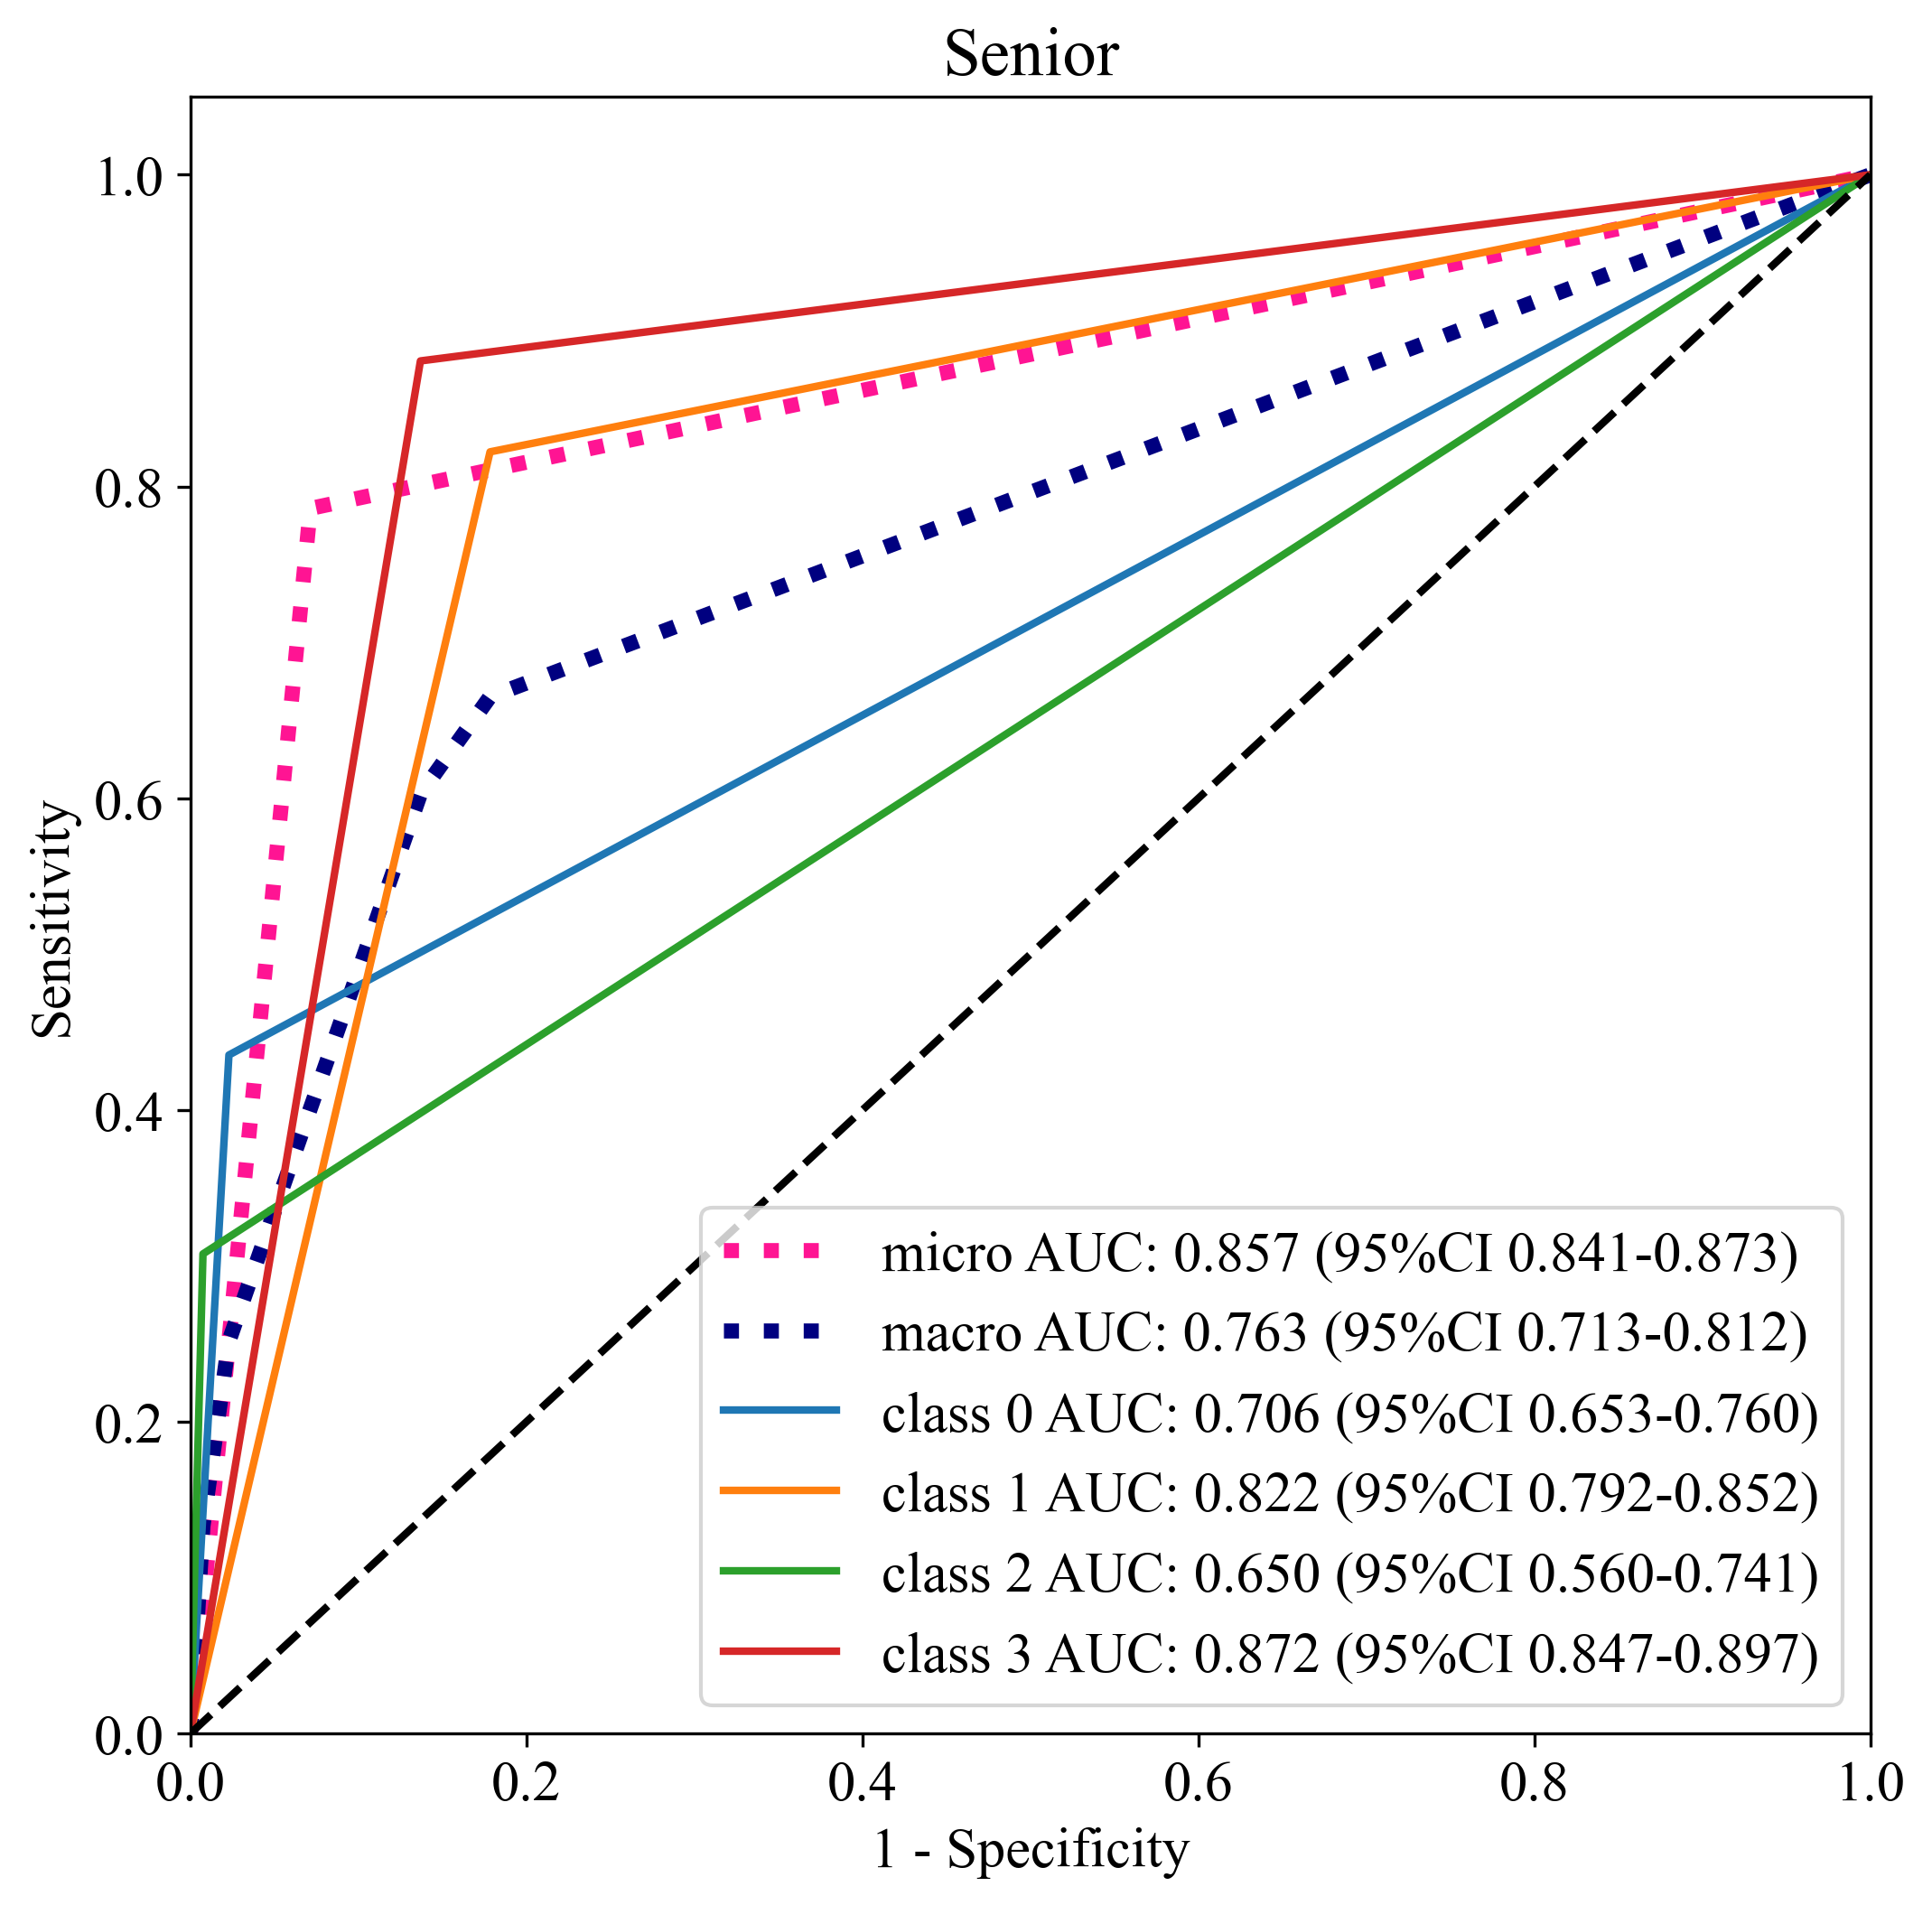

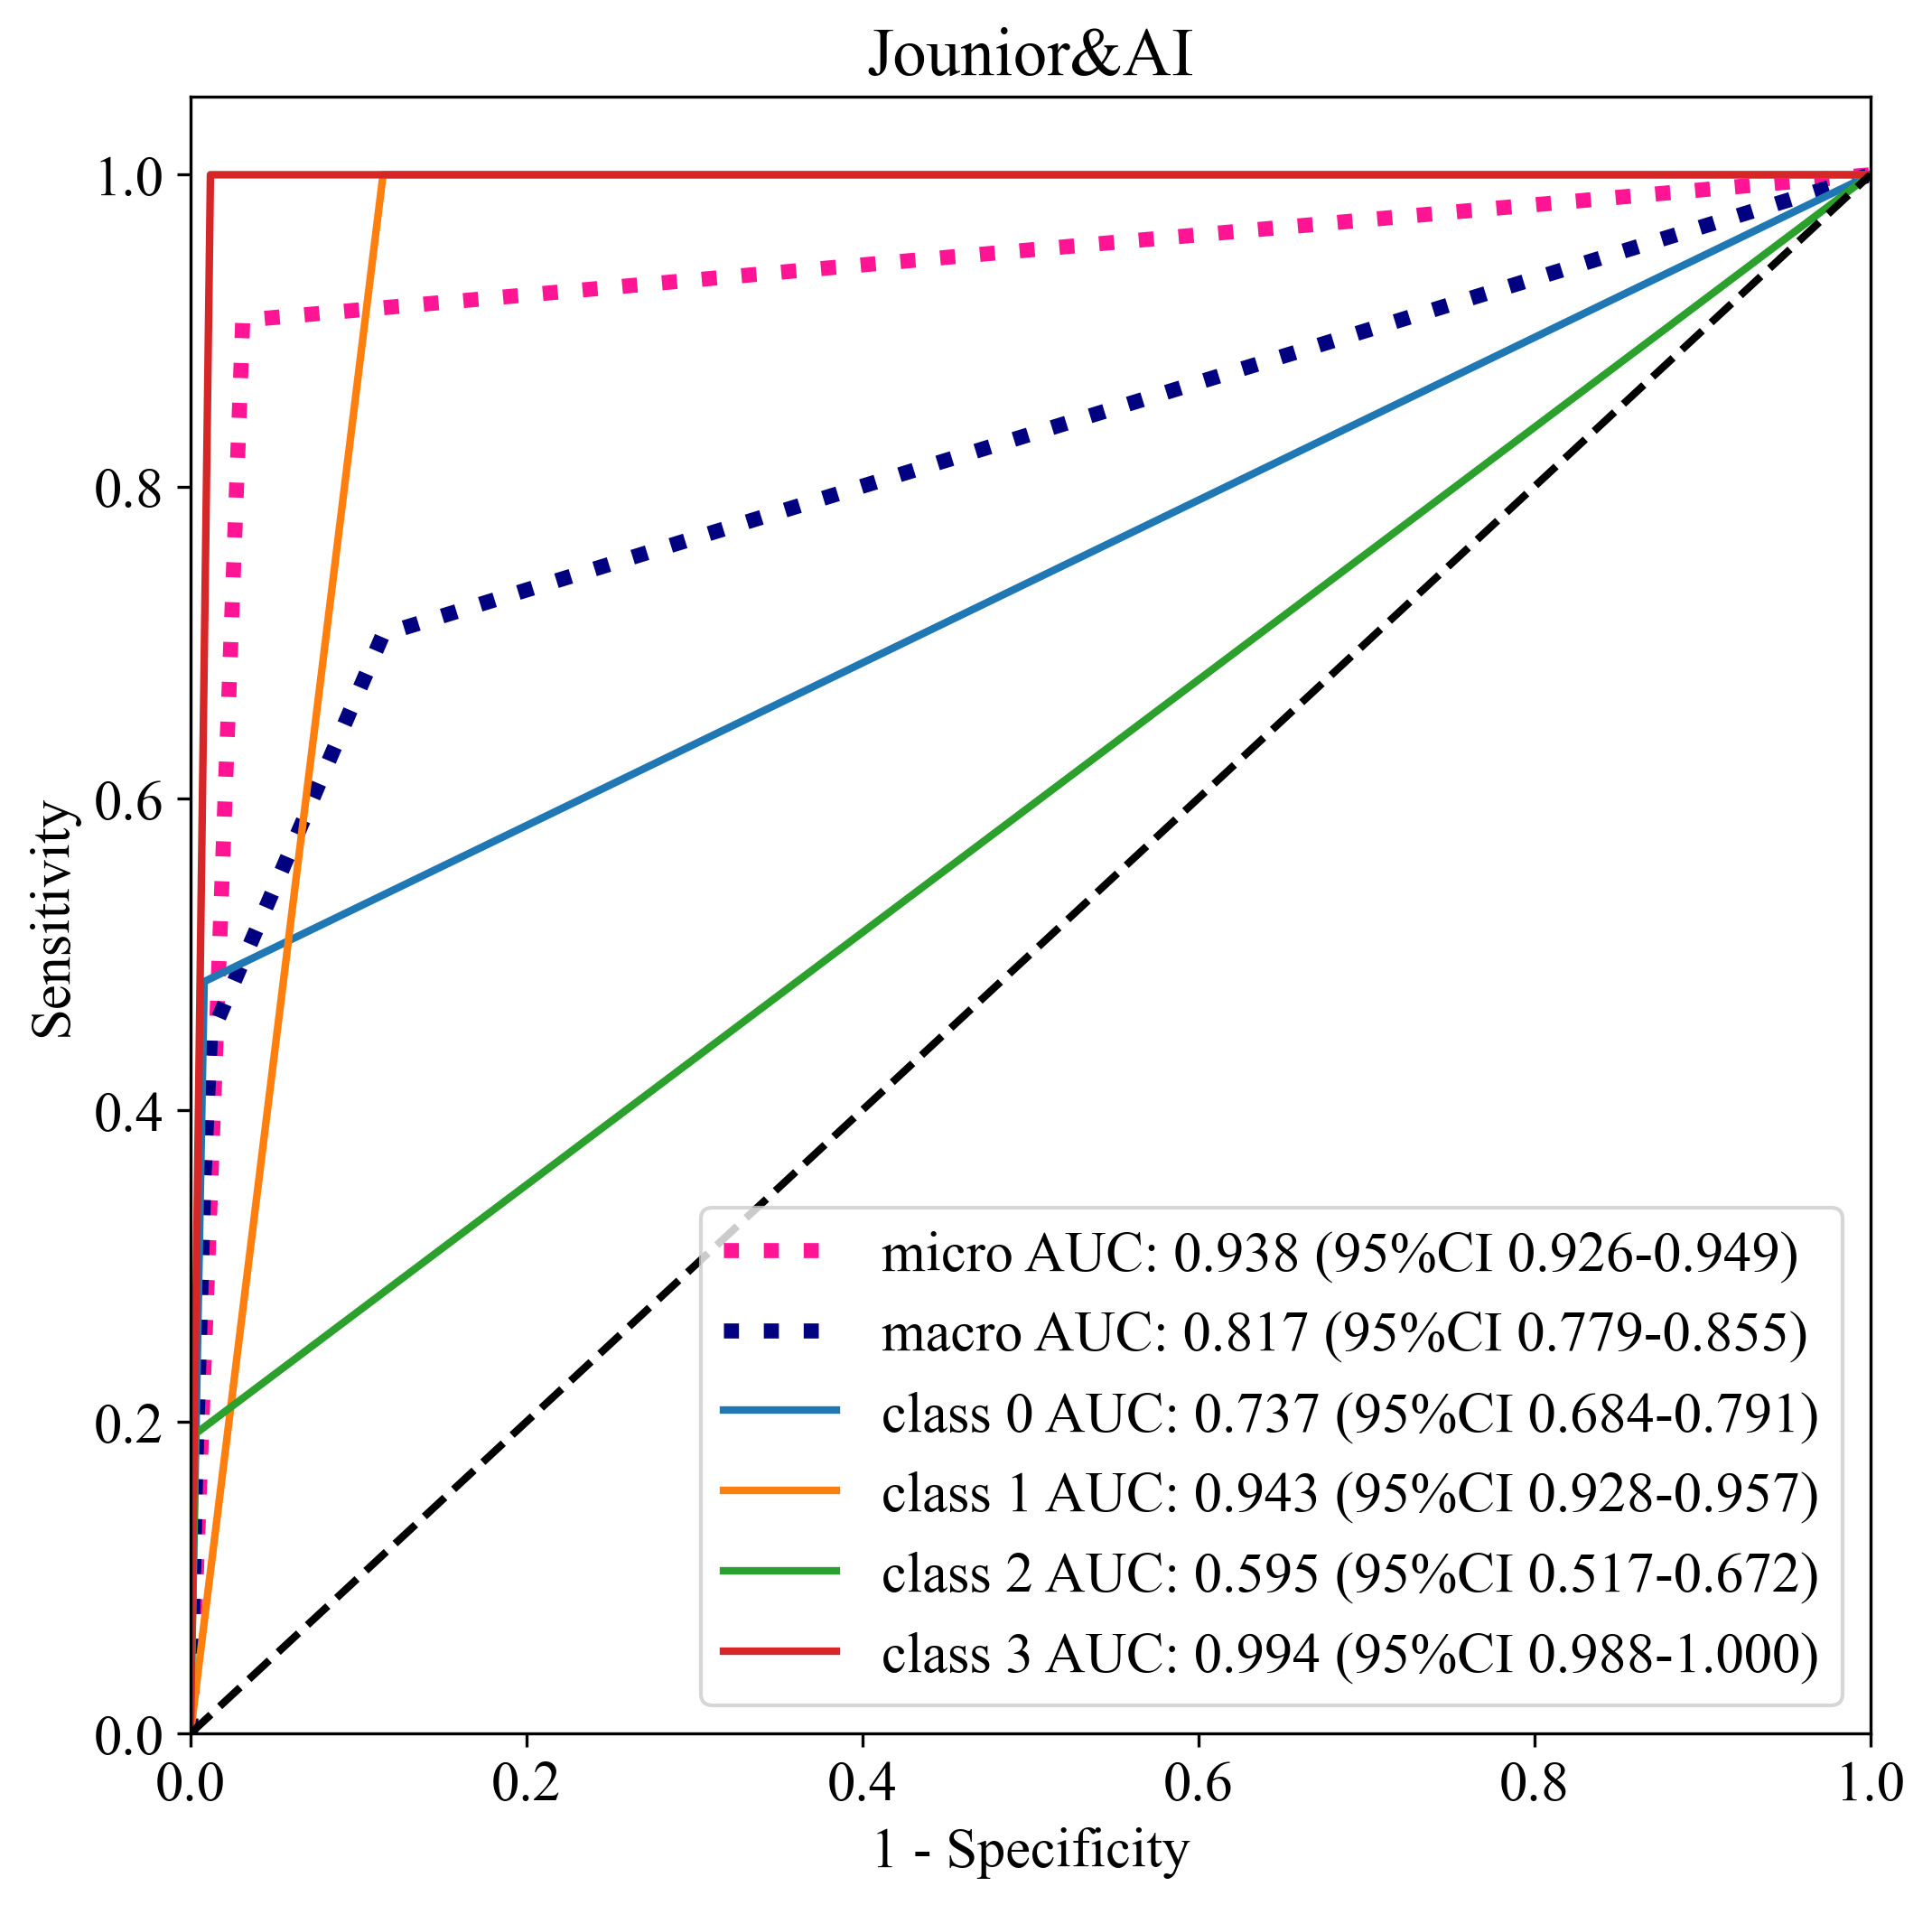

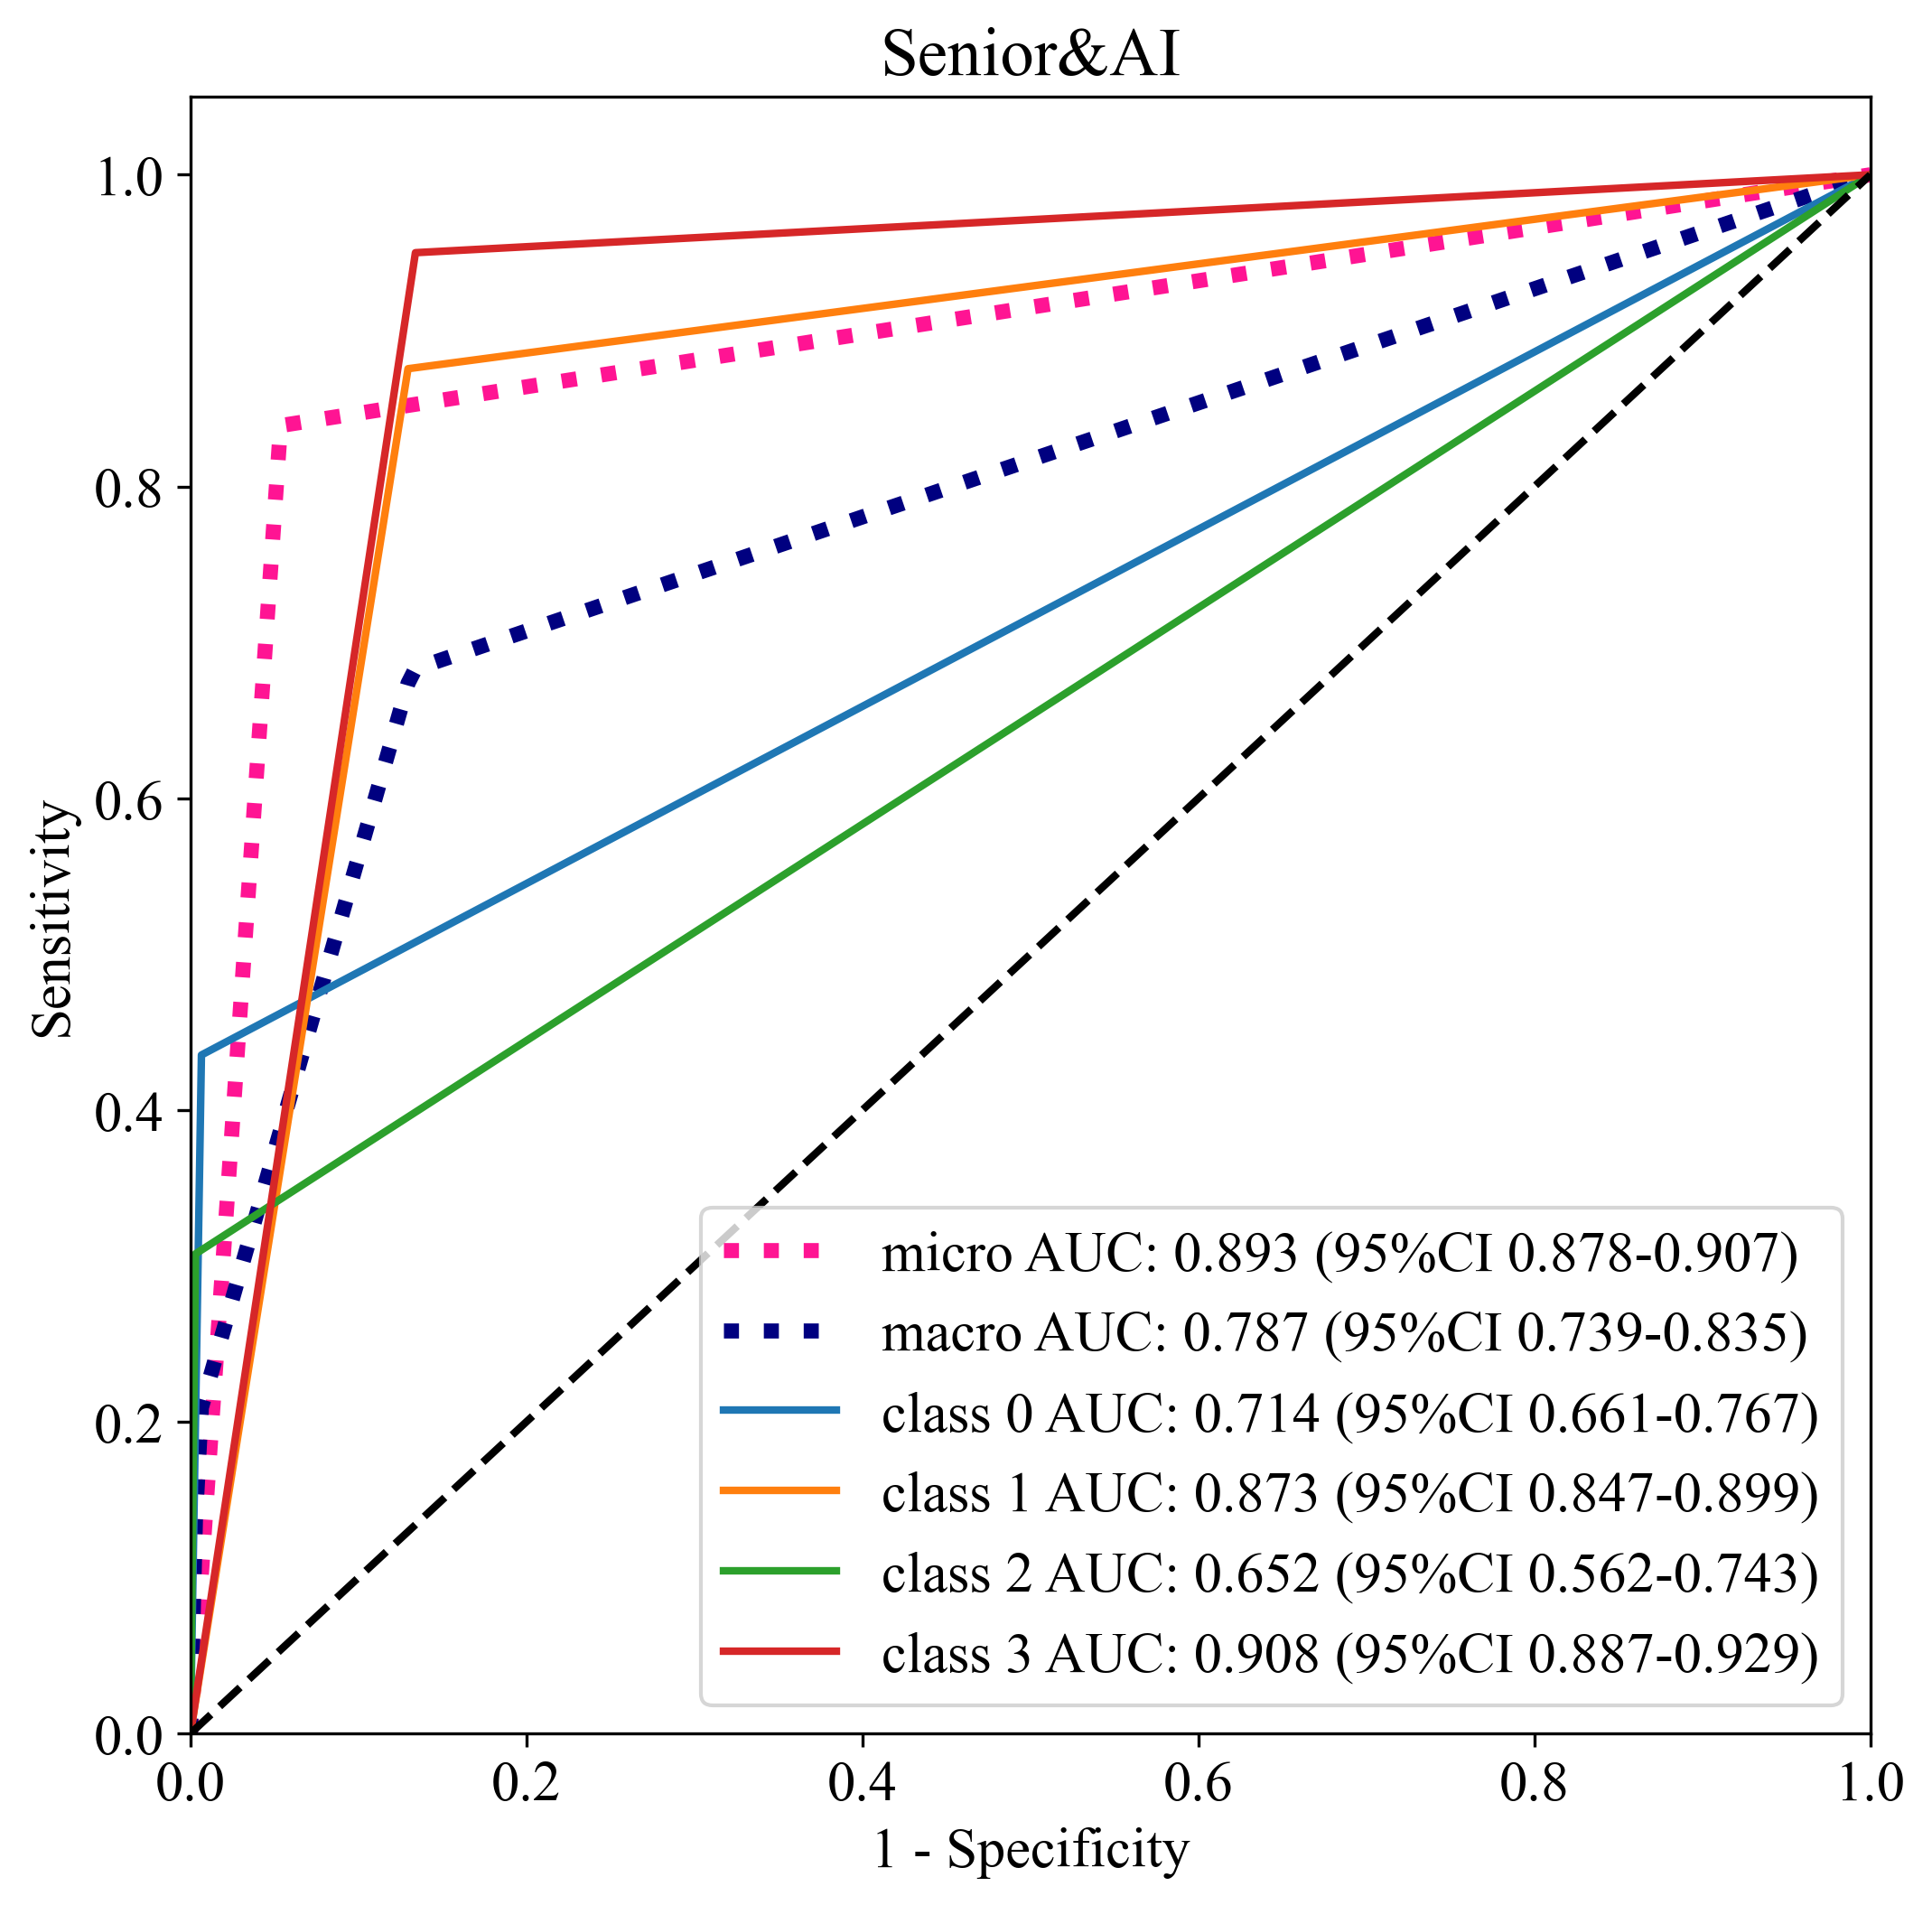

In [62]:
import onekey_algo.custom.components as okcomp
save_dir = r'J:\4type\model\histogramWRT\human_ai'
for model in model_names:
    plt.figure(figsize=(8, 8))
    okcomp.comp1.draw_roc_per_class(np.array(ALL_results['label']), ALL_results.filter(regex=f'^{model}_').values, n_classes=4,
                                            include_spec_class=True, title=f"{model}")
    plt.savefig(os.path.join(save_dir, f'{model}_roc.svg'), bbox_inches = 'tight')
    plt.show()    

# 辅助前后的变化

In [ ]:
import seaborn as sns
c = pd.concat([a, b], axis=0)
c = c[(c['Signature'] != 'AI')]

# sns.catplot(data=titanic, x="sex", y="survived", hue="class", kind="point")
for m in ['AUC', 'Accuracy', 'Sensitivity', 'Specificity']:
    ax = sns.catplot(
        data=c.reset_index(), kind="point",
        x="Cohort", y=m,
        hue="group"
    )
    ax.set_xlabels(visible=False)# .set_visible(False)
    plt.ylim(0.5 if m != 'Sensitivity' else 0.4)
    from matplotlib.ticker import FormatStrFormatter
    ax.ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.savefig(f'img\human_boost_{m}.svg', bbox_inches='tight')
    plt.show()